
Spam Detection Data (X_train head):
     NumSuspiciousKeywords
11                      7
47                      3
85                      7
28                      6
93                      9

Spam Target (y_train head):
 11    1
47    0
85    1
28    1
93    1
Name: IsSpam, dtype: int64

Predictions on X_test:
 [0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0]

Actual Spam Labels:
 [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]

Logistic Regression Accuracy: 0.97


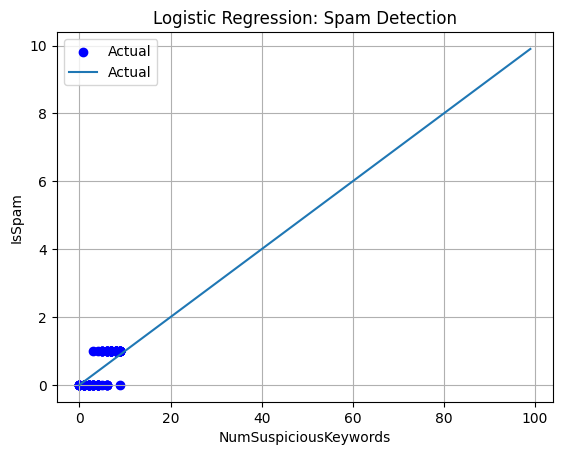

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(42)
keywords = np.random.randint(0, 10, 100)
spam_prob = 1 / (1 + np.exp(-(keywords - 5)))
is_spam = (np.random.rand(100) < spam_prob).astype(int)
df = pd.DataFrame({
    'NumSuspiciousKeywords': keywords,
    'IsSpam': is_spam
})
X = df[['NumSuspiciousKeywords']]
y = df['IsSpam']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("\nSpam Detection Data (X_train head):\n", X_train.head())
print("\nSpam Target (y_train head):\n", y_train.head())
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nPredictions on X_test:\n", y_pred)
print("\nActual Spam Labels:\n", list(y_test))
print("\nLogistic Regression Accuracy:", round(accuracy, 2))
plt.scatter(X, y, color='blue', label='Actual')
x_range_df = pd.DataFrame(np.arange(0, 10, 0.1), columns=['NumSuspiciousKeywords'])
y_prob = logreg.predict_proba(x_range_df)[:, 1]
plt.plot(x_range_df, label='Actual')
plt.xlabel('NumSuspiciousKeywords')
plt.ylabel('IsSpam')
plt.title('Logistic Regression: Spam Detection')
plt.legend()
plt.grid(True)
plt.show()